# Supervised learning ML models
Candidates:
- KNN
- Elastic Net
- Naive Bayes
- SVM
- Gaussian Process
- XGBoost

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
import matplotlib.pyplot as plt

## 0. Data

In [7]:
data = pd.read_csv('../../Datasets/date-recession-monthly-6-indices-proc.csv')
data.head()

,DATE,Time_step,F1-T10Y2Y_norm,F3-IC4WSA_norm,F4-PERMIT_norm,F5-NFCICREDIT_norm,F6-UMCSENT_norm,F7-A576RC1_norm,Recession,Recession_within_6mo,Recession_within_12mo
0,1978-01-31,0,0.524392,0.038496,0.701143,0.351203,0.543548,0.014578,0,0,0
1,1978-02-28,1,0.523961,0.042729,0.698857,0.393372,0.553226,0.015577,0,0,0
2,1978-03-31,2,0.522467,0.041980,0.734857,0.425639,0.464516,0.017030,0,0,0
3,1978-04-30,3,0.512325,0.034445,0.820000,0.446548,0.509677,0.018732,0,0,0
4,1978-05-31,4,0.498043,0.032777,0.716000,0.458441,0.530645,0.019435,0,0,0


In [12]:
X = data.drop(columns=['DATE', 'Recession', 'Recession_within_6mo', 'Recession_within_12mo'], axis=1)
y = data['Recession_within_6mo']
# y = data['Recession']
# y_6 = data['Recession_within_6mo']
# y_12 = data['Recession_within_12mo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
X_train

,Time_step,F1-T10Y2Y_norm,F3-IC4WSA_norm,F4-PERMIT_norm,F5-NFCICREDIT_norm,F6-UMCSENT_norm,F7-A576RC1_norm
0,0,0.524392,0.038496,0.701143,0.351203,0.543548,0.014578
1,1,0.523961,0.042729,0.698857,0.393372,0.553226,0.015577
2,2,0.522467,0.041980,0.734857,0.425639,0.464516,0.017030
3,3,0.512325,0.034445,0.820000,0.446548,0.509677,0.018732
4,4,0.498043,0.032777,0.716000,0.458441,0.530645,0.019435
...,...,...,...,...,...,...,...
427,427,0.908791,0.035312,0.257714,0.330861,0.517742,0.575339
428,428,0.913739,0.031333,0.280571,0.330046,0.443548,0.576967
429,429,0.888579,0.037302,0.303429,0.322632,0.374194,0.578354
430,430,0.915598,0.035745,0.294857,0.314890,0.404839,0.583313


In [14]:
X_test

,Time_step,F1-T10Y2Y_norm,F3-IC4WSA_norm,F4-PERMIT_norm,F5-NFCICREDIT_norm,F6-UMCSENT_norm,F7-A576RC1_norm
432,432,0.925567,0.033568,0.264571,0.311048,0.503226,0.593543
433,433,0.909138,0.034512,0.300571,0.313903,0.509677,0.598233
434,434,0.897398,0.032758,0.316571,0.316417,0.483871,0.602257
435,435,0.890116,0.031347,0.329714,0.321389,0.550000,0.601785
436,436,0.866354,0.031603,0.288571,0.322729,0.514516,0.602202
...,...,...,...,...,...,...,...
536,536,0.361795,0.009180,0.600571,0.411358,0.138710,0.976532
537,537,0.350954,0.007940,0.570857,0.422115,0.159677,0.981749
538,538,0.306486,0.010263,0.478857,0.409012,0.109677,0.986078
539,539,0.294438,0.009972,0.470857,0.407195,0.156452,0.990056


## 1. KNN Classifier
- a non-parametric model
- key considerations: 
  - k value (too small -> overfit, too large -> oversmooth) 
  - distance metric 
  - data should be normalized

In [15]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)

📌 Note: high acc, but bc it always predict 0 -> labels imbalance problem

In [18]:
acc = accuracy_score(y_test, y_pred)
print(f"acc: {acc}")

acc: 0.926605504587156


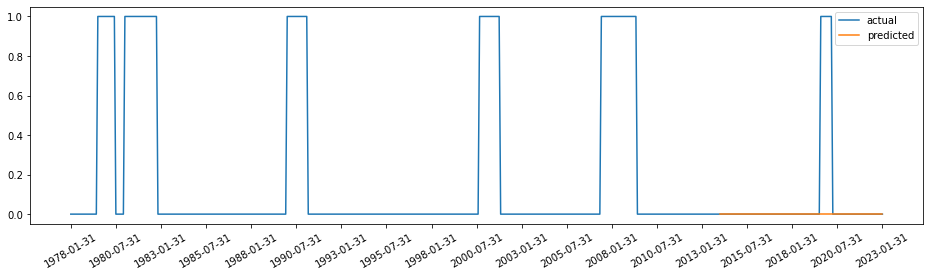

In [42]:
t = list(data['DATE'])

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(4)
ax.plot(t, y, label='actual')
ax.plot(t[int(0.8*len(t)):], y_pred, label='predicted')
ax.tick_params(axis='x', labelrotation=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
# plt.locator_params(axis='x', nbins=20)

plt.legend()
plt.show()